# 13주 Sklearn make_classification으로 생성된 데이터에 대해 이진 베이지안 모델

## pyspark 기본 셋팅

In [1]:
import os
import pyspark

myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession\
    .builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

### (1) X, Y 데이터를 생성

In [2]:
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

### (2) X의 평균과 표준편차 계산해서 출력

In [3]:
X.mean() #평균

-0.03497603458015534

In [4]:
X.std() #표준편차

1.240398413131047

### (3) 그래프 작성

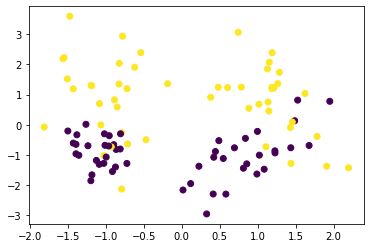

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], marker='o', c=Y) #c=Y로 색 구분
plt.show()

### (4) 훈련데이터, 테스트데이터 3:1로 분리

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25) #3:1이므로 test_size는 0.25

### (5) 훈련데이터에 대하여 BernoulliNB 모델링

In [7]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=0.0)

In [8]:
bnb.fit(X_train, Y_train)

BernoulliNB()

### (6) 테스트데이터에 대하여 예측값을 출력

#### 25개 가운데 6개 오류가 발생하였다. 정확성은 1 - 6/25 = 0.76이다.

In [9]:
list(zip(bnb.predict(X_test),Y_test, X_test))

[(0, 0, array([ 1.22691412, -0.86719334])),
 (0, 1, array([ 1.43854273, -1.28258808])),
 (1, 1, array([-1.19229864,  1.30664746])),
 (0, 0, array([ 0.81181572, -1.44385478])),
 (0, 1, array([-1.06372025, -0.00723442])),
 (0, 0, array([ 0.4889123 , -0.52808262])),
 (1, 1, array([0.74409542, 3.06593201])),
 (1, 1, array([-1.47375335,  3.59872748])),
 (1, 0, array([1.9489786 , 0.77643607])),
 (1, 1, array([1.45553905, 0.08933296])),
 (1, 1, array([1.15296313, 2.07312659])),
 (0, 0, array([ 0.41437205, -2.2994114 ])),
 (0, 0, array([-1.39201127, -0.96438154])),
 (1, 1, array([-1.54884973,  2.22817371])),
 (0, 0, array([-0.87217133, -1.40430699])),
 (0, 0, array([ 0.69408378, -0.76591759])),
 (0, 0, array([-0.89485774, -0.66189439])),
 (0, 1, array([-0.7929378 , -0.26696565])),
 (0, 1, array([ 1.90835987, -1.37750691])),
 (1, 1, array([-0.61867903,  1.90759954])),
 (0, 0, array([ 0.98996649, -1.63631559])),
 (0, 0, array([-1.18179758, -1.66288097])),
 (1, 0, array([-1.26054623,  0.01325957]

In [10]:
bnb.predict([[1,1], [1,-1], [-1,1], [-1,-1], [0,0]])

array([1, 0, 1, 0, 0])

### (7) 테스트데이터에 대하여 예측과 실제의 정확성 출력

In [11]:
bnb.score(X_test, Y_test)

0.76